# When Successes and Failures are high enough

## $(p_1,p_2)$ known

Suppose that we are interested in comparing two approximately normal sampling distributions described by random variables $\dfrac{Y_1}{n_1} =  N\Big(p_1,\dfrac{p_1q_1}{n_1}\Big)$ and $\dfrac{Y_2}{n_2} =  N\Big(p_2,\dfrac{p_2q_2}{n_2}\Big)$, created from population distributions which are Bernoulli distributions. Note that $Y_1$ represents the sum of _successes_ in a sample set, and thus $\dfrac{Y_1}{n_1}$ represents sample proportions. For example, for any _kth_ sample set of $\dfrac{Y_1}{n_1}$, we calculate sample proportion statistic, $\dfrac{Y_{1k}}{n_1} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{1ki}$, where $Y_{1ki}$ is $i$th sample in $k$th sample set of sampling distribution described by $\dfrac{Y_1}{n_1}$. Similarly for $\dfrac{Y_2}{n_2}$. Then, if no of success and failures  are high enough \footnote{https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-z-test-proportions/v/hypothesis-test-for-difference-in-proportions}, that is at least > 10, as a general rule, we could assume that the random variable $W = \dfrac{Y_1}{n_1} - \dfrac{Y_2}{n_2}$ has approximately normal distribution $W = N(p_w, \sigma_w^2)$ where $p_w = p_1 - p_2$ and $\sigma_w = \sqrt{\dfrac{p_1q_1}{n_1} + \dfrac{p_2q_2}{n_2}}$ and has shown below, before standardization to Z. We _destandradize_ from Z, because, each $\alpha$  could be linked to corresponding $z$ score, which further could be linked to actual $w$ or x axis in question. 

\ 


In [1]:
%load_ext tikzmagic

In [2]:
preamble = '''
    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
'''

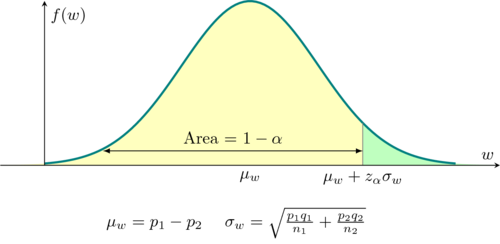

In [8]:
    %%tikz -p pgfplots -x $preamble -s 500,500
 \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$w$,
        ylabel=$f(w)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.645*\sd}
    \def\cihigh{\mean + 1.645*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow-2:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$\mu_w$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$\mu_w + z_{\alpha}\sigma_w$}; 
    
    \node[below=0.75cm,text width=6cm] at (axis cs:\mean, 0)
    {
        $\mu_w = p_1 - p_2 \ \ \ \ \sigma_w = \sqrt{\frac{p_1q_1}{n_1} + \frac{p_2q_2}{n_2}}$
    };
    
    \end{axis}

The significance level $\alpha$, corresponds to the rest of $1-\alpha$ area, that is green area as shown above. 

\begin{equation}
    \begin{aligned}
        P(W \geq \mu_w + z_{\alpha}\sigma_w) = \alpha \nonumber \\
        \therefore P\Big(\dfrac{W - \mu_w}{\sigma_w} \geq z_{\alpha}\Big) = \alpha \nonumber \\
        P\Bigg(\dfrac{(\frac{Y_1}{n_1} - \frac{Y_2}{n_2}) - (p_1 - p_2)}{\sqrt{ \frac{p_1q_1}{n_1} + \frac{p_2q_2}{n_2}  }} \geq z_{\alpha}\Bigg) = \alpha \label{eq:401}
    \end{aligned}
\end{equation}

Typically, null hypothesis is $p_1 = p_2$, so, assigning it to a common $p$, i.e $p1=p2=p$,..

\begin{equation}
    \begin{aligned}
        P\Bigg(\dfrac{\frac{Y_1}{n_1} - \frac{Y_2}{n_2}}{\sqrt{ \frac{p_1q_1}{n_1} + \frac{p_2q_2}{n_2}  }} \geq z_{\alpha}\Bigg) = \alpha \nonumber \\
        P\Bigg(\dfrac{\frac{Y_1}{n_1} - \frac{Y_2}{n_2}}{\sqrt{ pq (\frac{1}{n_1} + \frac{1}{n_2})  }} \geq z_{\alpha}\Bigg) = \alpha  \label{eq:402}      
    \end{aligned}
\end{equation}

Thus the z score for given sample data would be $z = \dfrac{\frac{Y_1}{n_1} - \frac{Y_2}{n_2}}{\sqrt{ pq (\frac{1}{n_1} + \frac{1}{n_2})  }}$

So if our alternate hypothesis is that $H_a: p_1 > p_2$, then we could calculate Z score as above and if that is beyond $z_{\alpha}$ we could reject null hypothesis. 

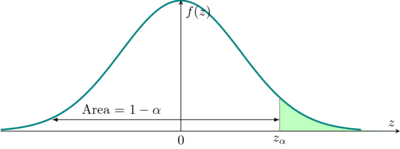

In [5]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
		no markers, 
		domain=-3:3, 
		samples=100,
		ymin=0,
		axis lines*=left, 
		xlabel=$z$,
		ylabel=$f(z)$,
		height=5cm, 
		width=12cm,
		xtick=\empty, 
		ytick=\empty,
		enlargelimits=false, 
		clip=false, 
		axis on top,
		grid = major,
		axis lines = middle
		]
		
		\def\mean{0}
		\def\sd{1}
		\def\cilow{\mean - 1.645*\sd}
		\def\cihigh{\mean + 1.645*\sd}
		
		
		\addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
		
		\addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
		
		\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
		\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
		
		
	    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above left] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

		\node[below] at (axis cs:\mean, 0)  {0}; 
		\node[below] at (axis cs:\cihigh, 0)  {$z_{\alpha}$}; 
		
		
		\end{axis}

We could simlarly derive for $H_a: p_1 < p_2$, and $H_a: p_1 \neq p_2$. 

## $(p_1,p_2)$ unknown

Of course, the above section was for pedagogical purposes, to illustrate the concept. In reality, the individual $p_1$ and $p_2$ are not hypothesized typically, and usually compared only to see if there is significant evidence that if one is greater/smaller/different from the other. In which case we simply could use our best estimator $\hat{p}$ for calculating standard deviation in place of $p$. There are usually two ways, here. 


#### Way 1: Calculate weighted $p$  

This is usually given as $\hat{p} = \dfrac{Y_1 + Y_2}{n_1 + n_2}$. And then, $\ref{eq:402}$ beocmes

\begin{equation}
    \begin{aligned}
        P\Bigg(\dfrac{\frac{Y_1}{n_1} - \frac{Y_2}{n_2}}{\sqrt{ \hat{p}\hat{q} (\frac{1}{n_1} + \frac{1}{n_2})  }} \geq z_{\alpha}\Bigg) = \alpha 
    \end{aligned}
\end{equation}

At the time of this writing, I could not find a derivation for the same, so over to next one. 

#### Way 2: Use sample $\hat{p_1},\hat{p_2}$

This is straight forward approach directly from $\ref{eq:401}$, with $p_1 = p_2$  

\begin{equation}
    \begin{aligned}
        P\Bigg(\dfrac{\hat{p_1} - \hat{p_2}}{\sqrt{ \frac{\hat{p_1}\hat{q_1}}{n_1} + \frac{\hat{p_2}\hat{q_2}}{n_2}  }} \geq z_{\alpha}\Bigg) = \alpha \label{eq:404}
    \end{aligned}
\end{equation}

#### Example

A machine shop that manufactures toggle levers has both a day and a night shift. A toggle lever is defective
if a standard nut cannot be screwed onto the threads. Let p1 and p2 be the proportion of defective levers among
those manufactured by the day and night shifts, respectively. We shall test the null hypothesis, $H_0: p_1 = p_2$,
against a two-sided alternative hypothesis based on two random samples, each of 1000 levers taken from the
production of the respective shifts.  

**(a)** Define the test statistic and a critical region that has an $\alpha = 0.05$ significance level. Sketch a standard
normal pdf illustrating this critical region.  

**(b)** If $y_1 = 37$ and $y_2 = 53$ defectives were observed for the day and night shifts, respectively, calculate
the value of the test statistic. Locate the calculated test statistic on your figure in part (a) and state your
conclusion.

This example was taken from exercise _8.3-11_ in \citet{robert2015}

**Solution:**  

Day: $y_1 = 37, n_1 = 1000, \hat{p_1} = \dfrac{Y_1}{n_1} = \dfrac{37}{1000} = 0.037$  
Night: $y_2 = 53, n_2 = 1000, \hat{p_2} = \dfrac{Y_2}{n_2} = \dfrac{53}{1000} = 0.053$  

**(a)**  

It is said, "two sided alternative hypothesis", so below is our required test statistic. note we have used our best estimators $(\hat{p_1},\hat{p_2})$ so result is only approximate. 

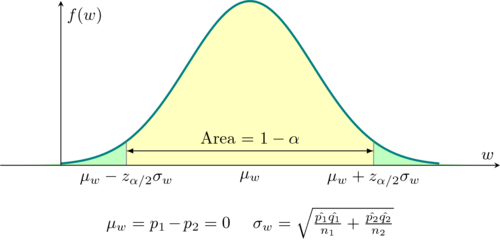

In [10]:
%%tikz -p pgfplots -x $preamble -s 500,500
 \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$w$,
        ylabel=$f(w)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cilow-2:\cilow] {gauss(x, \mean, \sd)}
    \closedcycle;    
    

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \pgfmathsetmacro\valueB{gauss(\cilow,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueB);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$\mu_w$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$\mu_w + z_{\alpha/2}\sigma_w$};
    \node[below] at (axis cs:\cilow, 0)  {$\mu_w - z_{\alpha/2}\sigma_w$}; 
    
    \node[below=0.75cm,text width=6cm] at (axis cs:\mean, 0)
    {
        $\mu_w = p_1 - p_2 = 0 \ \ \ \ \sigma_w = \sqrt{\frac{\hat{p_1}\hat{q_1}}{n_1} + \frac{\hat{p_2}\hat{q_2}}{n_2}}$
    };
    
    \end{axis}

Calculating the values $\sigma_w$, we could arrive at $w = \mu_w \pm z_{\alpha/2}\sigma_w = \pm z_{\alpha/2}\sigma_w$ value beyond which we could define critical region $\alpha$. Since it is double tailed, we already know $z_{0.025} = 1.96$. 

$\sigma_w = \sqrt{\frac{\hat{p_1}\hat{q_1}}{n_1} + \frac{\hat{p_2}\hat{q_2}}{n_2}} = \sqrt{\frac{(0.037)(1-0.037)}{1000} + \frac{(0.053)(1-0.053)}{1000}}$

In [14]:
p_1_hat, q_1_hat, p_2_hat, q_2_hat, n_1, n_2 = 0.037, 1-0.037, 0.053, 1-0.053, 1000, 1000
z_0025 = 1.96

from math import sqrt
s_w = sqrt( (p_1_hat*q_1_hat/n_1) + (p_2_hat*q_2_hat/n_2) )
print(s_w*z_0025)

0.018157472158866164


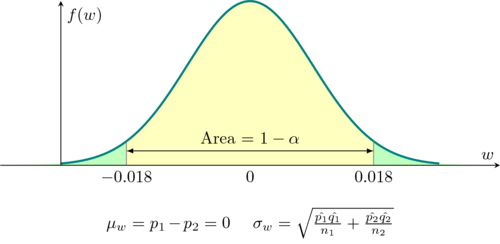

In [15]:
%%tikz -p pgfplots -x $preamble -s 500,500
 \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$w$,
        ylabel=$f(w)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cilow-2:\cilow] {gauss(x, \mean, \sd)}
    \closedcycle;    
    

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \pgfmathsetmacro\valueB{gauss(\cilow,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueB);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$0$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$0.018$};
    \node[below] at (axis cs:\cilow, 0)  {$-0.018$}; 
    
    \node[below=0.75cm,text width=6cm] at (axis cs:\mean, 0)
    {
        $\mu_w = p_1 - p_2 = 0 \ \ \ \ \sigma_w = \sqrt{\frac{\hat{p_1}\hat{q_1}}{n_1} + \frac{\hat{p_2}\hat{q_2}}{n_2}}$
    };
    
    \end{axis}

We could alreay take a call on our null hypothesis, Our $\hat{p_1} - \hat{p_2} = 0.037 - 0.053 = 0.016 < 0.0018$, so we cannot reject $H_0$. Our standardized test statistic would be simply z distribution as below. 

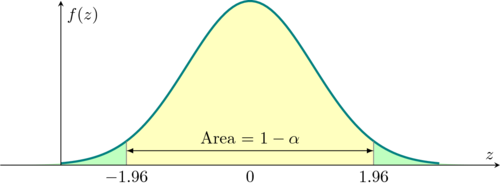

In [17]:
       %%tikz -p pgfplots -x $preamble -s 500,500
 \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$z$,
        ylabel=$f(z)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cilow-2:\cilow] {gauss(x, \mean, \sd)}
    \closedcycle;    
    

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \pgfmathsetmacro\valueB{gauss(\cilow,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueB);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$0$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$1.96$};
    \node[below] at (axis cs:\cilow, 0)  {$-1.96$}; 
    
    
    \end{axis}

**(b)**  

We have already kinda finished the solution, but for question's sake we could complete it fully by calculating the Z score. 

Using $\ref{eq:404}$, $z = \dfrac{\hat{p_1} - \hat{p_2}}{\sqrt{ \frac{\hat{p_1}\hat{q_1}}{n_1} + \frac{\hat{p_2}\hat{q_2}}{n_2}  }}$

In [19]:
num = p_1_hat - p_2_hat
den = s_w
num/den

-1.7271126578424703

Being double tailed operation, our z score is thus $\pm 1.727$. And since $\pm 1.727 < \pm 1.96$, we again **cannot reject null hypothesis** because then our probability of making Type I error would be more than allowed limit of $\alpha = 0.05$. Our standardized test statistic, with $\pm z_{\alpha/2} = \pm 1.727$ is shown below. 

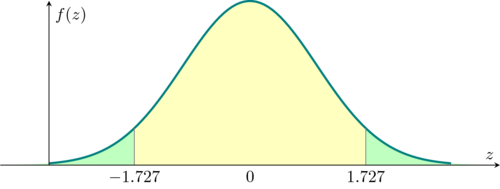

In [20]:
%%tikz -p pgfplots -x $preamble -s 500,500
 \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$z$,
        ylabel=$f(z)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.727*\sd}
    \def\cihigh{\mean + 1.727*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cilow-2:\cilow] {gauss(x, \mean, \sd)}
    \closedcycle;    
    

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \pgfmathsetmacro\valueB{gauss(\cilow,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueB);
    
    

    
    \node[below] at (axis cs:\mean, 0)  {$0$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$1.727$};
    \node[below] at (axis cs:\cilow, 0)  {$-1.727$}; 
    
    
    \end{axis}

Though visibly not clear, one could use z table to find that $z_{1.727}$ takes more area than 0.05 which corresponds to  $z_{1.96}$. Thus we conclude our answer. 

# Conditions Summary